## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to our first task: 'Old Polish Cars'

We're going to try to create a model to recognize two old polish cars. There are 2,400 labelled car photos available for training, and 270 in the test set that we have to try to label.

*   List item
*   List item



In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2

Here we import the libraries we need. We'll learn about what each does during the course.

# tmp - start

In [4]:
!ls drive/old_polish_cars

224_epoch9.h5
bleble.txt
FastAI_google_colab_setup-two_classes-wcz2.ipynb
FastAI_google_colab_setup-wcz1.ipynb
id_rsa_wcz@MacBook-Wojtka.local
lesson1.ipynb
lesson1-old_polish_cars_two_classes-wcz7.ipynb
lesson1-wcz1-dogscats-colab.ipynb
lesson1-wcz3-old_polish_cars.ipynb
lesson1-wcz4-old_polish_cars.ipynb
lesson1-wcz5-old_polish_cars.ipynb
lesson1-wcz6a-old_polish_cars.ipynb
lesson1-wcz6-old_polish_cars.ipynb
old_polish_cars_two_classes_v1-split.zip
old_polish_cars_two_classes_v1.zip
old_polish_cars_two_classes_v2a-split.zip
old_polish_cars_two_classes_v2-split.zip
old_polish_cars_v5_photos-2017-11-15.tgz
plots_wcz.py
test1.txt
test2
test2.zip
Ubuntu_1604_Woj.pem
Ubuntu_1604_Woj.pub


In [2]:
!uptime

 08:21:52 up 9 min,  0 users,  load average: 0.36, 0.63, 0.47


In [5]:
!pwd

/content


In [59]:
ls -lah ~/.ssh

total 12K
drwx------ 2 root root 4.0K Apr 17 08:25 ./
drwxr-xr-x 1 root root 4.0K Apr 17 08:23 ../
-rw------- 1 root root  381 Apr 17 08:25 authorized_keys


In [0]:
mkdir .ssh

In [0]:
!chmod 700 .ssh

In [0]:
!cat drive/old_polish_cars/Ubuntu_1604_Woj.pub > /root/.ssh/authorized_keys

In [0]:
!echo "ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABAQCu1Dw72tIPTOqUY4izZTCnmbZYaDn+e7kPVp0bieOai67n2t0gidHQvGySoHUFRXj84y4Hvdqm2UHqFcZZyqhUnUTbi7zvz+WdjVXDUbpAnHyZ+zRQZoA6JvkP7N8xUEHSgOJoxp7Wl/fJqjo6loUclamFwBKJvyotDceyk0ogZWl+46mNlxCiVfZqj92z6lvC92HOH9ZRXOLa6QIfp81kLT5w2A1CvuIOee8NOr8PFbIXcOm32cFOkQb978ukuG7j2syH8oe6NrWDomFYTXbw4IMPoSXYSJcodrabpbntvq5W5bXkQzCUbnoqaJE0FybDLJMBENAs0kh6kU/Xhul5 wcz@MacBook-Wojtka.local" > ~/.ssh/authorized_keys

In [62]:
!cat /content/.ssh/authorized_keys

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABAQCu1Dw72tIPTOqUY4izZTCnmbZYaDn+e7kPVp0bieOai67n2t0gidHQvGySoHUFRXj84y4Hvdqm2UHqFcZZyqhUnUTbi7zvz+WdjVXDUbpAnHyZ+zRQZoA6JvkP7N8xUEHSgOJoxp7Wl/fJqjo6loUclamFwBKJvyotDceyk0ogZWl+46mNlxCiVfZqj92z6lvC92HOH9ZRXOLa6QIfp81kLT5w2A1CvuIOee8NOr8PFbIXcOm32cFOkQb978ukuG7j2syH8oe6NrWDomFYTXbw4IMPoSXYSJcodrabpbntvq5W5bXkQzCUbnoqaJE0FybDLJMBENAs0kh6kU/Xhul5 wcz@MacBook-Wojtka.local


In [0]:
!chmod 600 .ssh/authorized_keys

In [0]:
!ssh -
 wcz@bekaes.beanflows.com

In [0]:
!chmod 600 drive/old_polish_cars/Ubuntu_1604_Woj.pem

In [22]:
!whereis sshd

sshd: /usr/sbin/sshd /usr/share/man/man8/sshd.8.gz


In [0]:
!/usr/sbin/sshd

In [0]:
mkdir -p /var/run/sshd

In [43]:
!ps ax|grep ssh

 2981 ?        Ss     0:00 /usr/sbin/sshd
 3087 pts/0    Ss+    0:01 /bin/sh -c ssh -oStrictHostKeyChecking=no -v -i /content/drive/old_polish_cars/Ubuntu_1604_Woj.pem -L 2222:localhost:22 wcz@bekaes.beanflows.com -N 
 3088 pts/0    S+     0:00 ssh -oStrictHostKeyChecking=no -v -i /content/drive/old_polish_cars/Ubuntu_1604_Woj.pem -L 2222:localhost:22 wcz@bekaes.beanflows.com -N
 3107 pts/1    Ss+    0:00 /bin/sh -c ps ax|grep ssh
 3109 pts/1    S+     0:00 grep ssh


In [0]:
!kill 3033 3034

In [29]:
!systemctl restart sshd

Failed to connect to bus: No such file or directory


In [30]:
!ls /etc/init.d

cron  hwclock.sh  procps  ssh		       x11-common
dbus  kmod	  rsync   unattended-upgrades


In [31]:
!/etc/init.d/ssh status

 * sshd is running


In [82]:
!/etc/init.d/ssh stop

 * Stopping OpenBSD Secure Shell server sshd
   ...done.


In [94]:
!/etc/init.d/ssh restart

 * Restarting OpenBSD Secure Shell server sshd
   ...done.


In [39]:
!ssh -oStrictHostKeyChecking=no -i /content/drive/old_polish_cars/Ubuntu_1604_Woj.pem root@localhost

root@localhost's password: 


In [45]:
!ssh -oStrictHostKeyChecking=no -i /content/drive/old_polish_cars/Ubuntu_1604_Woj.pem -p 2222 root@localhost

In [46]:
!passwd --help

Usage: passwd [options] [LOGIN]

Options:
  -a, --all                     report password status on all accounts
  -d, --delete                  delete the password for the named account
  -e, --expire                  force expire the password for the named account
  -h, --help                    display this help message and exit
  -k, --keep-tokens             change password only if expired
  -i, --inactive INACTIVE       set password inactive after expiration
                                to INACTIVE
  -l, --lock                    lock the password of the named account
  -n, --mindays MIN_DAYS        set minimum number of days before password
                                change to MIN_DAYS
  -q, --quiet                   quiet mode
  -r, --repository REPOSITORY   change password in REPOSITORY repository
  -R, --root CHROOT_DIR         directory to chroot into
  -S, --status                  report password status on the named account
  -u, --unlock                  unlock th

In [49]:
!echo "root102" | passwd root --stdin

passwd: unrecognized option '--stdin'
Usage: passwd [options] [LOGIN]

Options:
  -a, --all                     report password status on all accounts
  -d, --delete                  delete the password for the named account
  -e, --expire                  force expire the password for the named account
  -h, --help                    display this help message and exit
  -k, --keep-tokens             change password only if expired
  -i, --inactive INACTIVE       set password inactive after expiration
                                to INACTIVE
  -l, --lock                    lock the password of the named account
  -n, --mindays MIN_DAYS        set minimum number of days before password
                                change to MIN_DAYS
  -q, --quiet                   quiet mode
  -r, --repository REPOSITORY   change password in REPOSITORY repository
  -R, --root CHROOT_DIR         directory to chroot into
  -S, --status                  report password status on the named account
  -

In [51]:
!chpasswd --help

Usage: chpasswd [options]

Options:
  -c, --crypt-method METHOD     the crypt method (one of NONE DES MD5 SHA256 SHA512)
  -e, --encrypted               supplied passwords are encrypted
  -h, --help                    display this help message and exit
  -m, --md5                     encrypt the clear text password using
                                the MD5 algorithm
  -R, --root CHROOT_DIR         directory to chroot into
  -s, --sha-rounds              number of SHA rounds for the SHA*
                                crypt algorithms



In [0]:
!echo "root:root102" | chpasswd

In [86]:
cat /etc/ssh/sshd_config

#	$OpenBSD: sshd_config,v 1.101 2017/03/14 07:19:07 djm Exp $

# This is the sshd server system-wide configuration file.  See
# sshd_config(5) for more information.

# This sshd was compiled with PATH=/usr/bin:/bin:/usr/sbin:/sbin

# The strategy used for options in the default sshd_config shipped with
# OpenSSH is to specify options with their default value where
# possible, but leave them commented.  Uncommented options override the
# default value.

#Port 22
#AddressFamily any
#ListenAddress 0.0.0.0
#ListenAddress ::

#HostKey /etc/ssh/ssh_host_rsa_key
#HostKey /etc/ssh/ssh_host_ecdsa_key
#HostKey /etc/ssh/ssh_host_ed25519_key

# Ciphers and keying
#RekeyLimit default none

# Logging
#SyslogFacility AUTH
#LogLevel INFO

# Authentication:

#LoginGraceTime 2m
#PermitRootLogin prohibit-password
#StrictModes yes
#MaxAuthTries 6
#MaxSessions 10

PubkeyAuthentication yes

# Expect .ssh/authorized_keys2 to be disregarded by default in future. ble
AuthorizedKeysFile      %h/.ssh/authorized_

In [84]:
cat /content/drive/old_polish_cars/sshd_config3

#	$OpenBSD: sshd_config,v 1.101 2017/03/14 07:19:07 djm Exp $

# This is the sshd server system-wide configuration file.  See
# sshd_config(5) for more information.

# This sshd was compiled with PATH=/usr/bin:/bin:/usr/sbin:/sbin

# The strategy used for options in the default sshd_config shipped with
# OpenSSH is to specify options with their default value where
# possible, but leave them commented.  Uncommented options override the
# default value.

#Port 22
#AddressFamily any
#ListenAddress 0.0.0.0
#ListenAddress ::

#HostKey /etc/ssh/ssh_host_rsa_key
#HostKey /etc/ssh/ssh_host_ecdsa_key
#HostKey /etc/ssh/ssh_host_ed25519_key

# Ciphers and keying
#RekeyLimit default none

# Logging
#SyslogFacility AUTH
#LogLevel INFO

# Authentication:

#LoginGraceTime 2m
#PermitRootLogin prohibit-password
#StrictModes yes
#MaxAuthTries 6
#MaxSessions 10

PubkeyAuthentication yes

# Expect .ssh/authorized_keys2 to be disregarded by default in future. ble
AuthorizedKeysFile      %h/.ssh/authorized_

In [0]:
cp /etc/ssh/sshd_config /content/drive/old_polish_cars/

In [0]:
cp /content/drive/old_polish_cars/sshd_config4 /etc/ssh/sshd_config

In [0]:
!touch /content/drive/old_polish_cars/ble2

In [78]:
ls -lah /content/drive/old_polish_cars/

total 4.1G
drwxr-xr-x 2 root root 4.0K Apr  9 20:43 ./
drwxr-xr-x 2 root root 4.0K Apr 17 08:20 ../
-rw-r--r-- 1 root root 2.1M Apr 13 15:17 224_epoch9.h5
-rw-r--r-- 1 root root    0 Apr 17 09:14 ble
-rw-r--r-- 1 root root    0 Apr 17 09:16 ble2
-rw-r--r-- 1 root root   57 Apr 13 12:59 bleble.txt
-rw-r--r-- 1 root root  60K Apr 17 08:28 FastAI_google_colab_setup-two_classes-wcz2.ipynb
-rw-r--r-- 1 root root 101K Apr 13 08:48 FastAI_google_colab_setup-wcz1.ipynb
-rw-r--r-- 1 root root 1.8K Jan  3  2013 id_rsa_wcz@MacBook-Wojtka.local
-rw-r--r-- 1 root root 3.2M Mar 23 10:51 lesson1.ipynb
-rw-r--r-- 1 root root 3.8M Apr 17 09:16 lesson1-old_polish_cars_two_classes-wcz7.ipynb
-rw-r--r-- 1 root root 5.4M Apr 12 14:08 lesson1-wcz1-dogscats-colab.ipynb
-rw-r--r-- 1 root root  16M Apr 12 14:08 lesson1-wcz3-old_polish_cars.ipynb
-rw-r--r-- 1 root root 358K Apr 12 14:22 lesson1-wcz4-old_polish_cars.ipynb
-rw-r--r-- 1 root root  13M Apr  9 11:06 lesson1-wcz5-old_polish_cars.ipynb
-rw-r--r-- 1 ro

In [88]:
!adduser ble

Adding user `ble' ...
Adding new group `ble' (1000) ...
Adding new user `ble' (1000) with group `ble' ...
Creating home directory `/home/ble' ...
Copying files from `/etc/skel' ...
Enter new UNIX password: 
Retype new UNIX password: 

In [91]:
!adduser --disabled-password --gecos "" ble2

Adding user `ble2' ...
Adding new group `ble2' (1000) ...
Adding new user `ble2' (1000) with group `ble2' ...
Creating home directory `/home/ble2' ...
Copying files from `/etc/skel' ...


In [0]:
!echo "ble2:root102" | chpasswd

# tmp - end

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [0]:
PATH = "/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/"
sz=224

It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns `True` before you proceed. If you have problems with this, please check the FAQ and ask for help on [the forums](http://forums.fast.ai).

In [5]:
torch.cuda.is_available()

True

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return `True`, you may want to look into why.

In [6]:
torch.backends.cudnn.enabled

True

## First look at car pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'maluch', 'polonez', etc.).

In [7]:
os.listdir(PATH)

['train', 'valid']

In [8]:
os.listdir(f'{PATH}valid')

['maluch', 'polonez']

In [9]:
files = os.listdir(f'{PATH}valid/maluch')[:5]
files

['fp126p.1.000026.jpg',
 'fp126p.1.000034.jpg',
 '81_1487452812.18.jpg',
 '15_1487452754.54.jpg',
 '7_1487452742.54.jpg']

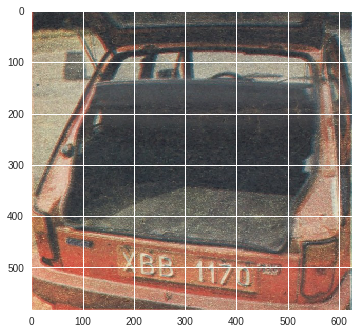

In [10]:
img = plt.imread(f'{PATH}valid/maluch/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [11]:
img.shape

(583, 625, 3)

In [12]:
img[:4,:4]

array([[[201,  89,  65],
        [186,  87,  66],
        [162,  84,  71],
        [125,  70,  65]],

       [[209,  97,  73],
        [187,  88,  67],
        [161,  83,  70],
        [121,  66,  61]],

       [[212, 100,  76],
        [189,  90,  69],
        [162,  84,  71],
        [122,  67,  62]],

       [[216, 106,  81],
        [201, 102,  81],
        [170,  92,  79],
        [128,  73,  66]]], dtype=uint8)

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *old polish cars* model in 3 lines of code, and under 20 seconds:

In [0]:
# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [13]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 26954262.46it/s]


100%|██████████| 5/5 [00:08<00:00,  1.69s/it]


Widget Javascript not detected.  It may not be installed or enabled properly.


epoch      trn_loss   val_loss   accuracy   
    0      0.526566   0.336001   0.85348   
    1      0.410759   0.2942     0.897436  
    2      0.358604   0.264483   0.901099  
    3      0.332596   0.261508   0.912088  
    4      0.29423    0.274553   0.897436  
    5      0.271757   0.255185   0.904762  
    6      0.261486   0.24983    0.901099  
 87%|████████▋ | 34/39 [00:00<00:00, 35.78it/s, loss=0.245]

    7      0.246159   0.237115   0.908425  
    8      0.231205   0.285501   0.901099  
    9      0.226934   0.224817   0.919414  



[array([0.22482]), 0.9194139198505835]

In [15]:
learn.fit(0.01, 10)

Widget Javascript not detected.  It may not be installed or enabled properly.


epoch      trn_loss   val_loss   accuracy   
    0      0.180638   0.234814   0.930403  
    1      0.192282   0.248227   0.919414  
    2      0.198164   0.244802   0.912088  
    3      0.186737   0.208193   0.92674   
    4      0.168802   0.201757   0.923077  
    5      0.16834    0.204362   0.930403  
    6      0.163646   0.232723   0.904762  
                                                           

    7      0.146104   0.23384    0.919414  
    8      0.139174   0.218997   0.92674   
    9      0.131119   0.196637   0.912088  



[array([0.19664]), 0.9120879120879121]

In [0]:
learn.save('224_epoch19')

In [0]:
PATH2 = Path("/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/")

In [48]:
model_paths = list((PATH2 / 'models').iterdir()); model_paths

[PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/models/224_epoch9a.h5'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/models/224_epoch9.h5')]

In [0]:
model_path = model_paths[0]

In [0]:
!cp $model_path ~/drive/old_polish_cars/

How good is this model? Well, few years ago for similar task, the state of the art was 80% accuracy. But putting out the image recognition Kaggle competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition.

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [15]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [16]:
# from here we know that 'maluch' is label 0 and 'polonez' is label 1.
data.classes

['maluch', 'polonez']

In [17]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(273, 2)

In [18]:
log_preds[:10]

array([[-0.00518, -5.26648],
       [-0.07152, -2.67336],
       [-0.63957, -0.74976],
       [-1.18363, -0.36552],
       [-0.03152, -3.47271],
       [-0.0418 , -3.19571],
       [-0.11536, -2.21683],
       [-0.00167, -6.39593],
       [-1.07124, -0.41944],
       [-0.0037 , -5.60184]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(polonez)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


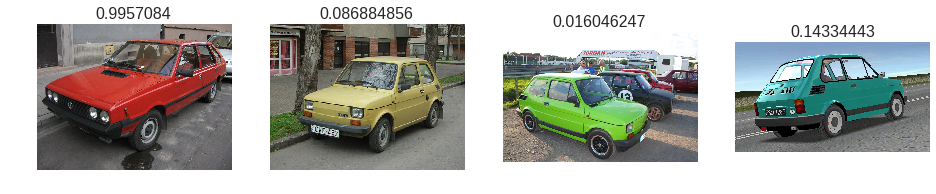

In [24]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


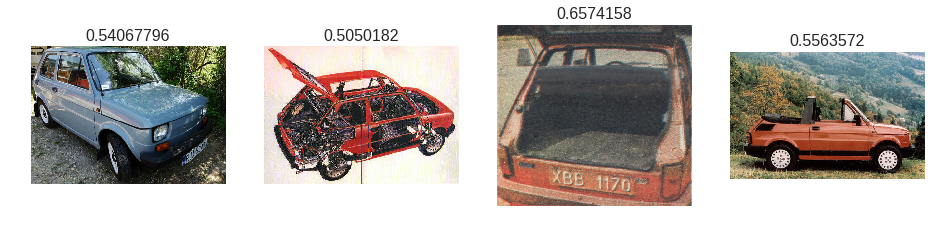

In [25]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct maluchs


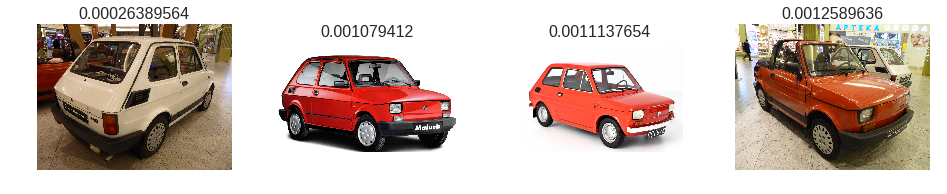

In [27]:
plot_val_with_title(most_by_correct(0, True), "Most correct maluchs")

Most correct polonezes


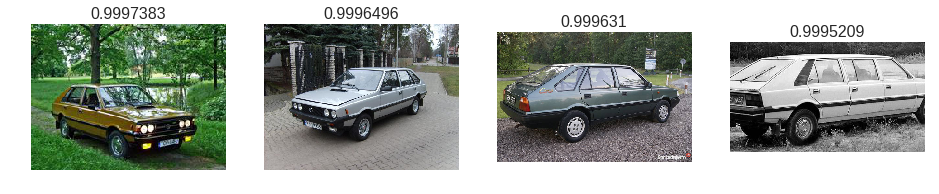

In [32]:
plot_val_with_title(most_by_correct(1, True), "Most correct polonezes")

Most incorrect maluchs


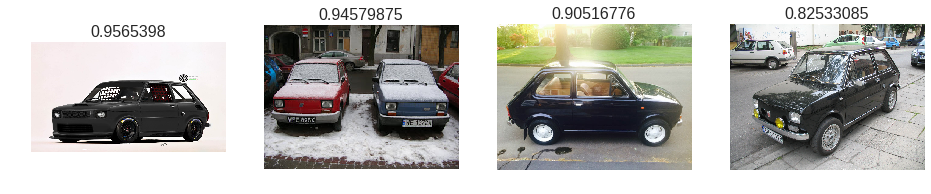

In [29]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect maluchs")

Most incorrect polonezes


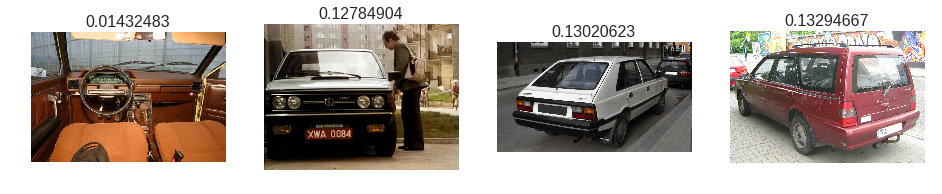

In [33]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect polonezes")

Most uncertain predictions


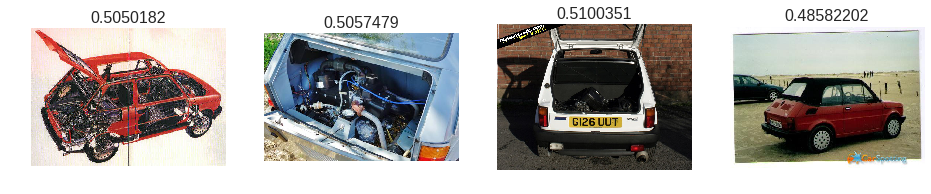

In [31]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affect model performance.

The method `learn.lr_find()` helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), where we simply keep increasing the learning rate from a very small value, until the loss stops decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [33]:
lrf=learn.lr_find()

Widget Javascript not detected.  It may not be installed or enabled properly.


 79%|███████▉  | 31/39 [00:00<00:00, 33.63it/s, loss=3.21]


Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

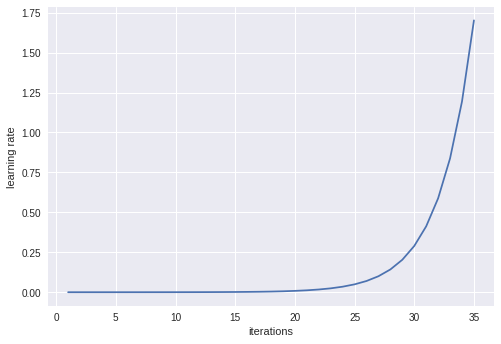

In [34]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

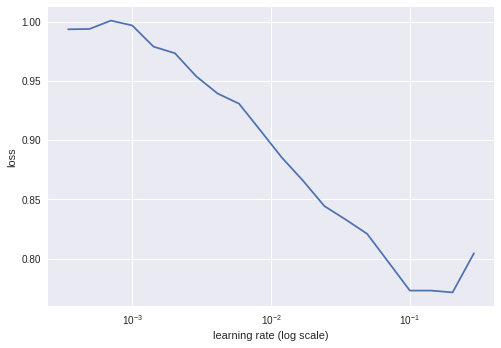

In [35]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we training the model, so you may want to re-run this function from time to time.

## Improving our model

### Data augmentation

If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of cars, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

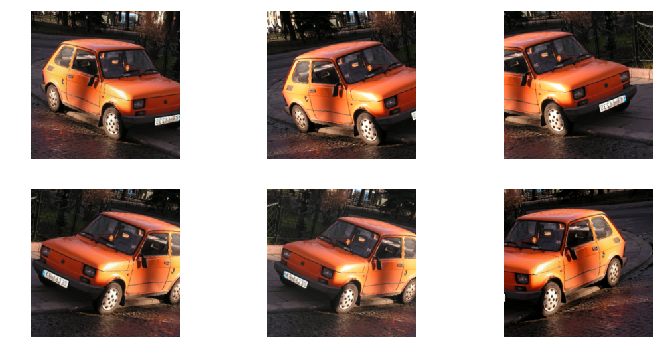

In [41]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [46]:
learn.fit(1e-2, 1)

Widget Javascript not detected.  It may not be installed or enabled properly.


epoch      trn_loss   val_loss   accuracy   
    0      0.519651   0.317958   0.871795  



[array([0.31796]), 0.8717948724498679]

In [0]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [0]:
learn.fit(1e-2, 3, cycle_len=1)

What is that `cycle_len` parameter? What we've done here is used a technique called *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

However, we may find ourselves in a part of the weight space that isn't very resilient - that is, small changes to the weights may result in big changes to the loss. We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase the learning rate (this is the 'restarts' in 'SGDR'), which will force the model to jump to a different part of the weight space if the current area is "spikey". Here's a picture of how that might look if we reset the learning rates 3 times (in this paper they call it a "cyclic LR schedule"):

![SGDR](https://raw.githubusercontent.com/fastai/fastai/master/courses/dl1/images/sgdr.png)
(From the paper [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

The number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*, and is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

In [0]:
learn.sched.plot_lr()

Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.

In [0]:
learn.save('224_lastlayer')

In [47]:
learn.load('224_lastlayer')

RuntimeError: ignored

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In [0]:
learn.unfreeze()

Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as *differential learning rates*, although there's no standard name for this techique in the literature that we're aware of.

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

In [0]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [48]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [49]:
accuracy_np(probs, y)

0.8754578754578755

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[103  19]
 [ 15 136]]


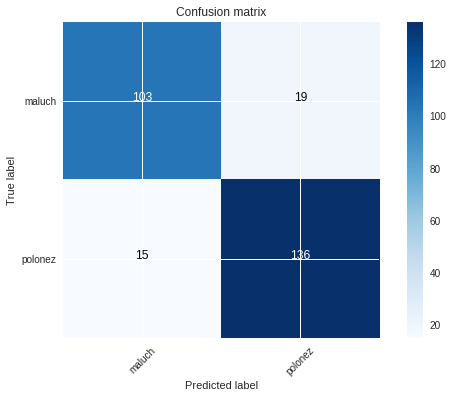

In [52]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect maluchs


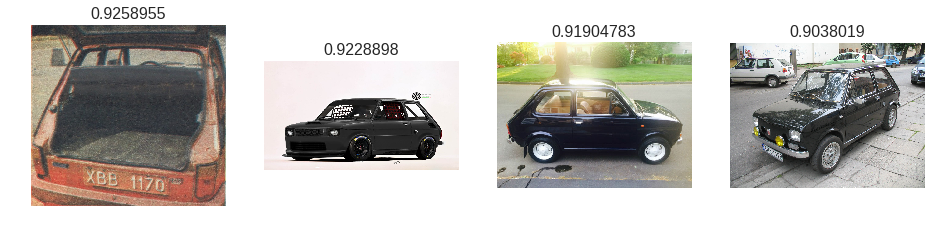

In [54]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect maluchs")

Most incorrect polonezes


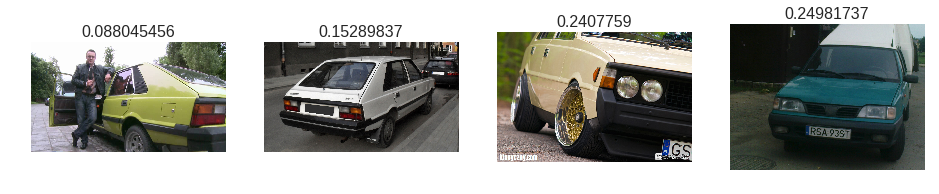

In [55]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect polonezes")

## Review: easy steps to train a world-class image classifier

1. Enable data augmentation, and precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## Understanding the code for our first model

Let's look at the old polish cars code line by line.

**tfms** stands for *transformations*. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.

In [0]:
tfms = tfms_from_model(resnet34, sz)

We need a <b>path</b> that points to the dataset. In this path we will also store temporary data and final results. `ImageClassifierData.from_paths` reads data from a provided path and creates a dataset ready for training.

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions. The pretained model was trained for 1000 classes therfore the final layer predicts a vector of 1000 probabilities. The model for old polish cars needs to output a two dimensional vector. The diagram below shows in an example how this was done in one of the earliest successful CNNs. The layer "FC8" here would get replaced with a new layer with 2 outputs.

<img src="https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg" width="500">
[original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [0]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

*Parameters*  are learned by fitting a model to the data. *Hyparameters* are another kind of parameter, that cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Two examples of hyperparameters are the *learning rate* and the *number of epochs*.

During iterative training of a neural network, a *batch* or *mini-batch* is a subset of training samples used in one iteration of Stochastic Gradient Descent (SGD). An *epoch* is a single pass through the entire training set which consists of multiple iterations of SGD.

We can now *fit* the model; that is, use *gradient descent* to find the best parameters for the fully connected layer we added, that can separate maluch pictures from polonez pictures. We need to pass two hyperameters: the *learning rate* (generally 1e-2 or 1e-3 is a good starting point, we'll look more at this next) and the *number of epochs* (you can pass in a higher number and just stop training when you see it's no longer improving, then re-run it with the number of epochs you found works well.)

In [59]:
learn.fit(1e-2, 1)

Widget Javascript not detected.  It may not be installed or enabled properly.


epoch      trn_loss   val_loss   accuracy   
    0      0.518147   0.293748   0.875458  



[array([0.29375]), 0.8754578761128715]

## Analyzing results: loss and accuracy

When we run `learn.fit` we print 3 performance values (see above.) Here 0.03 is the value of the **loss** in the training set, 0.0226 is the value of the loss in the validation set and 0.9927 is the validation accuracy. What is the loss? What is accuracy? Why not to just show accuracy?

**Accuracy** is the ratio of correct prediction to the total number of predictions.

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1.

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [61]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting maluchs and polonezes. Exercise: play with `preds` to get a lower loss for this example. 

**Example:** Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

`loss = -log(0.9) = 0.10`

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss should be much larger.

loss = -log(1-0.9) = 2.30

- Exercise: look at the other cases and convince yourself that this make sense.
- Exercise: how would you rewrite `binary_loss` using `if` instead of `*` and `+`?

Why not just maximize accuracy? The binary classification loss is an easier function to optimize.

# tmp

In [35]:
who

A	 AdaptiveConcatPool2d	 AddPadding	 ArraysDataset	 ArraysIndexDataset	 ArraysNhotDataset	 BaseDataset	 BasicModel	 Callback	 
CenterCrop	 ChannelOrder	 CircularLR	 CircularLR_beta	 Compose	 ConvLearner	 ConvnetBuilder	 CoordTransform	 CosAnneal	 
Counter	 CropType	 Cutout	 DataFrameSummary	 DataLoader	 Dataset	 Denormalize	 F	 FP16	 
FileLink	 FilesArrayDataset	 FilesDataset	 FilesIndexArrayDataset	 FilesIndexArrayRegressionDataset	 FilesNhotArrayDataset	 Flatten	 FloatTensor	 GoogleNetResize	 
IPKernelApp	 IPython	 Image	 ImageClassifierData	 ImageData	 ImageEnhance	 ImageModelResults	 ImageOps	 InceptionResnetV2	 
InceptionV4	 IntEnum	 IterBatch	 Iterable	 LR_Finder	 LR_Finder2	 LR_Updater	 Lambda	 LayerOptimizer	 
Learner	 LoggingCallback	 LongTensor	 LossRecorder	 ModelData	 NoCrop	 Normalize	 OrderedDict	 PATH	 
PIL	 PassThru	 Path	 ProcessPoolExecutor	 RandomBlur	 RandomCrop	 RandomDihedral	 RandomFlip	 RandomLighting	 
RandomRotate	 RandomRotateZoom	 RandomScale	 RandomStretch	

In [38]:
ls -lah ~/data/old_polish_cars

total 4.0G
drwxr-xr-x 6 root root 4.0K Apr 13 12:12 ./
drwxr-xr-x 3 root root 4.0K Apr 13 06:34 ../
drwxr-xr-x 4 root root 4.0K Apr 13 06:20 old_polish_cars_two_classes_v1/
drwxr-xr-x 6 root root 4.0K Apr 13 07:32 old_polish_cars_two_classes_v1-split/
-rw-r--r-- 1 root root 286M Apr 13 07:30 old_polish_cars_two_classes_v1-split.zip
-rw-r--r-- 1 root root 286M Apr 13 06:47 old_polish_cars_two_classes_v1.zip
drwxr-xr-x 6 root root 4.0K Apr 13 08:45 old_polish_cars_two_classes_v2a-split/
-rw-r--r-- 1 root root 707M Apr 13 08:43 old_polish_cars_two_classes_v2a-split.zip
drwxr-xr-x 8 root root 4.0K Apr 13 08:10 old_polish_cars_two_classes_v2-split/
-rw-r--r-- 1 root root 708M Apr 13 07:59 old_polish_cars_two_classes_v2-split.zip
-rw-r--r-- 1 root root 2.1G Apr 13 12:13 old_polish_cars_v5_photos-2017-11-15.tgz
